In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

s = ct.tf('s')

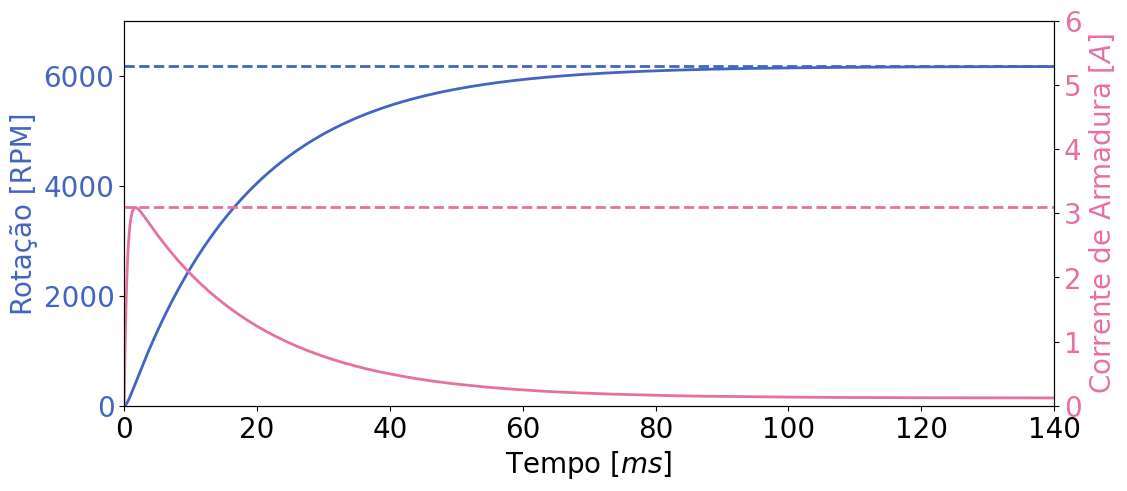

In [2]:
#Constantes:
R = 7.27
L = 3.18e-3
K = 3.58e-2
B = 6.64e-6
J = 3.43e-6

#Malha do sistema:
Ge = ct.tf(1, [L, R], inputs='v', outputs='ia')
kaphi1 = ct.tf(K, 1, inputs='ia', outputs='t')
Gm = ct.tf(1, [J, B], inputs='t', outputs='w')
kaphi2 = ct.tf(K, 1, inputs='w', outputs='vb')
sum = ct.summing_junction(inputs=['Vt', '-vb'], output='v')
sys = ct.interconnect([Ge, kaphi1, Gm, kaphi2, sum], inputs='Vt', outputs=['w', 'ia'])

#Simulação do sistema:
ts = 1e-5
tf = 150e-3
t = np.arange(0, tf, ts)
u = np.ones(int(tf/ts)+1)*24
t, yout = ct.input_output_response(sys, t, u, [0, 0])

#Plot das curvas:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Tempo [$ms$]')  
ax1.set_ylabel('Rotação [RPM]', color='C0')   
plt.plot(t*1e3, ((yout[0]*60)/(2*np.pi)), color='C0')
plt.plot((0,140), (6172, 6172), linestyle='dashed', color='C0')
ax1.tick_params(axis ='y', labelcolor='C0')
ax1.set_ylim(0, 7000)
plt.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Corrente de Armadura [$A$]', color='C1') 
plt.plot(t*1e3, yout[1], color='C1')
plt.plot((0,140), (3.1, 3.1), linestyle='dashed', color='C1')
ax2.tick_params(axis ='y', labelcolor='C1')
ax2.set_ylim(0, 6)
ax2.set_xlim(0, 140)
plt.grid()

plt.savefig('curves/sim-mot1.eps', dpi=600, transparent=True, bbox_inches='tight')

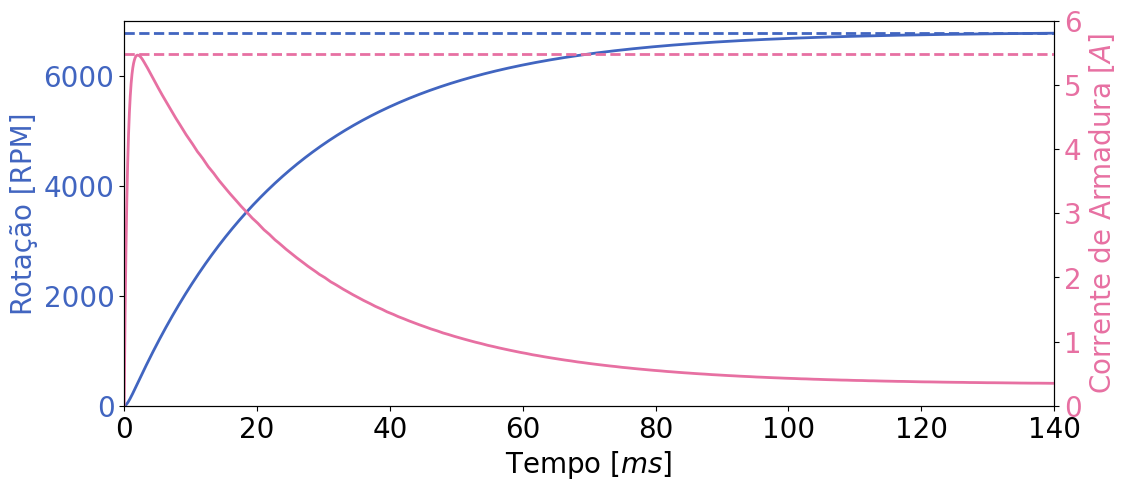

In [3]:
#Constantes:
R = 4.14
L = 2.07e-3
K = 3.18e-2
B = 14.76e-6
J = 6.48e-6

#Malha do sistema:
Ge = ct.tf(1, [L, R], inputs='v', outputs='ia')
kaphi1 = ct.tf(K, 1, inputs='ia', outputs='t')
Gm = ct.tf(1, [J, B], inputs='t', outputs='w')
kaphi2 = ct.tf(K, 1, inputs='w', outputs='vb')
sum = ct.summing_junction(inputs=['Vt', '-vb'], output='v')
sys = ct.interconnect([Ge, kaphi1, Gm, kaphi2, sum], inputs='Vt', outputs=['w', 'ia'])

#Simulação do sistema:
ts = 1e-5
tf = 150e-3
t = np.arange(0, tf, ts)
u = np.ones(int(tf/ts)+1)*24
t, yout = ct.input_output_response(sys, t, u, [0, 0])

#Plot das curvas:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Tempo [$ms$]')  
ax1.set_ylabel('Rotação [RPM]', color='C0')   
plt.plot(t*1e3, ((yout[0]*60)/(2*np.pi)), color='C0')
plt.plot((0,140), (6785, 6785), linestyle='dashed', color='C0')
ax1.tick_params(axis ='y', labelcolor='C0')
ax1.set_ylim(0, 7000)
plt.grid()

ax2 = ax1.twinx()
ax2.set_ylabel('Corrente de Armadura [$A$]', color='C1') 
plt.plot(t*1e3, yout[1], color='C1')
plt.plot((0,140), (5.48, 5.48), linestyle='dashed', color='C1')
ax2.tick_params(axis ='y', labelcolor='C1')
ax2.set_ylim(0, 6)
ax2.set_xlim(0, 140)
plt.grid()

plt.savefig('curves/sim-mot2.eps', dpi=600, transparent=True, bbox_inches='tight')